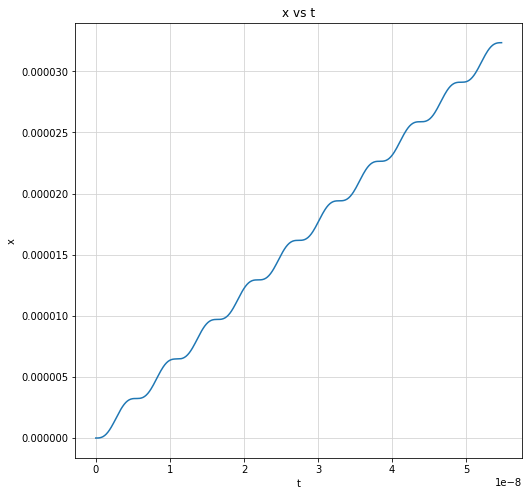

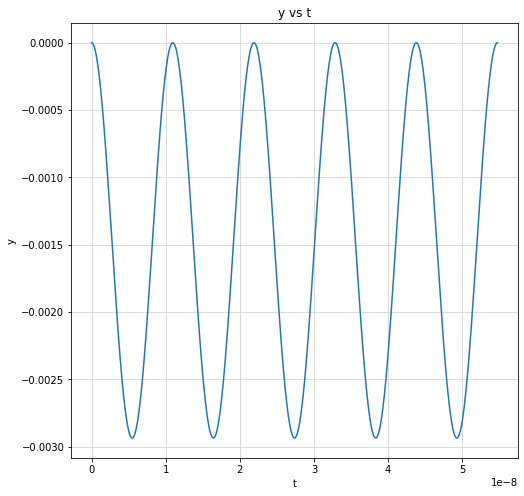

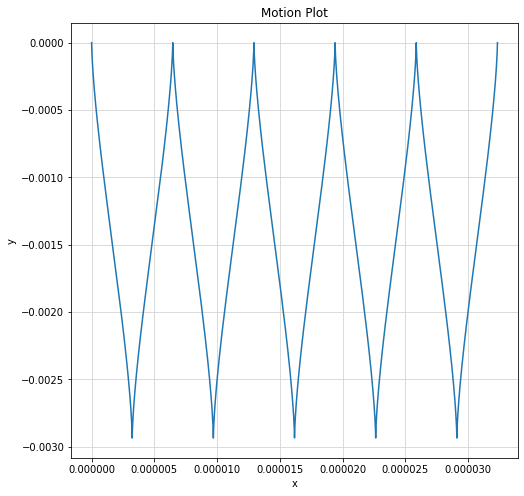

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import matplotlib
from scipy.integrate import odeint
%matplotlib inline

#a)

#define constants
c= 3e8
q= -1.6022e-19
m=9.11e-31

f=91.3e6
wvl=c/f
k=2*np.pi/wvl
omega=2*np.pi*f
I=10**4

A= np.sqrt(2*I*120*np.pi) # E-field magnitude
A_B=A/c #B-field magnitude
ncycles=5
max_time=ncycles*(1/f)

def Ey(x,t):
    return A*np.cos(k*x-omega*t)

def Bz(x,t):             # B must be only in z since E is y and k is x
    return A_B*np.cos(k*x-omega*t)

def ParticleAccel(x,vx,y,vy,t):
    Ax= q*vy*Bz(x,t)/m
    Ay= q*Ey(x,t)/m +q*vx*Bz(x,t)/m
    Az=0
    return Ax,Ay
t=np.linspace(0,max_time,500) #time

x=np.zeros(t.shape)
vx=np.zeros(t.shape)
y=np.zeros(t.shape)
vy=np.zeros(t.shape)

def vel_and_accel(vals,t):
    x,vx,y,vy=vals
    ax=ParticleAccel(x,vx,y,vy,t)[0]
    ay=ParticleAccel(x,vx,y,vy,t)[1]
    return [vx,ax,vy,ay]

init_conds=[0,0,0,0]
sol=odeint(vel_and_accel,init_conds,t)
#Apply odeint
x_sol=sol[:,0]
vx_sol=sol[:,1]
y_sol=sol[:,2]
vy_sol=sol[:,3]

    
figure(1,figsize=(8,8))
plt.plot(t,x_sol)
plt.title('x vs t')
plt.xlabel('t')
plt.ylabel('x')
plt.grid(c='lightgray')
figure(2,figsize=(8,8))
plt.plot(t,y_sol)
plt.title('y vs t')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(c='lightgray')
figure(3,figsize=(8,8))
plt.plot(x_sol,y_sol)
plt.title('Motion Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(c='lightgray')



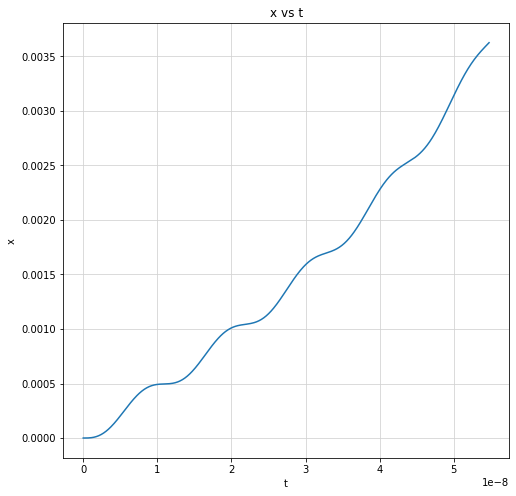

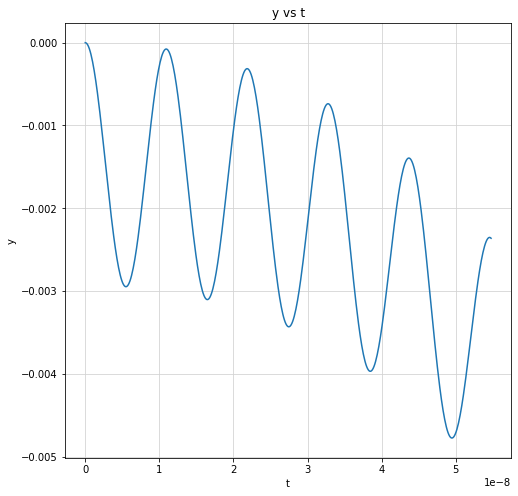

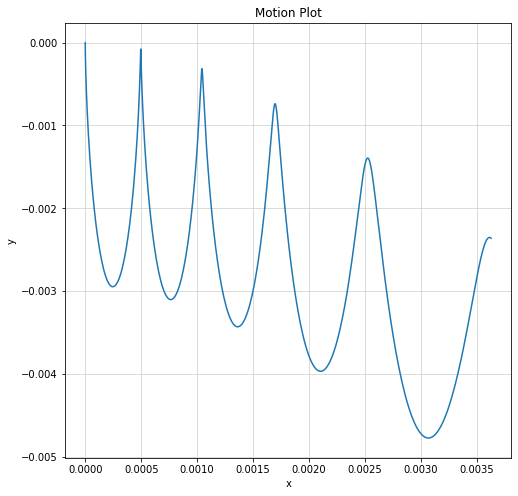

In [47]:
#b)
#Let's do the same thing but include a damping force
gamma=30000000 #value that has noticeable effect by trial and error
def ParticleAccel(x,vx,y,vy,t):
    Ax= q*vy*Bz(x,t)/m -gamma*vy
    Ay= q*Ey(x,t)/m +q*vx*Bz(x,t)/m-gamma*vx
    Az=0
    return Ax,Ay
t=np.linspace(0,max_time,500)
x=np.zeros(t.shape)
vx=np.zeros(t.shape)
y=np.zeros(t.shape)
vy=np.zeros(t.shape)

def vel_and_accel(vals,t):
    x,vx,y,vy=vals
    ax=ParticleAccel(x,vx,y,vy,t)[0]
    ay=ParticleAccel(x,vx,y,vy,t)[1]
    return [vx,ax,vy,ay]

init_conds=[0,0,0,0]
sol=odeint(vel_and_accel,init_conds,t)
#Apply odeint
x_sol=sol[:,0]
vx_sol=sol[:,1]
y_sol=sol[:,2]
vy_sol=sol[:,3]

    
figure(1,figsize=(8,8))
plt.plot(t,x_sol)
plt.title('x vs t')
plt.xlabel('t')
plt.ylabel('x')
plt.grid(c='lightgray')
figure(2,figsize=(8,8))
plt.plot(t,y_sol)
plt.title('y vs t')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(c='lightgray')
figure(3,figsize=(8,8))
plt.plot(x_sol,y_sol)
plt.title('Motion Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(c='lightgray')

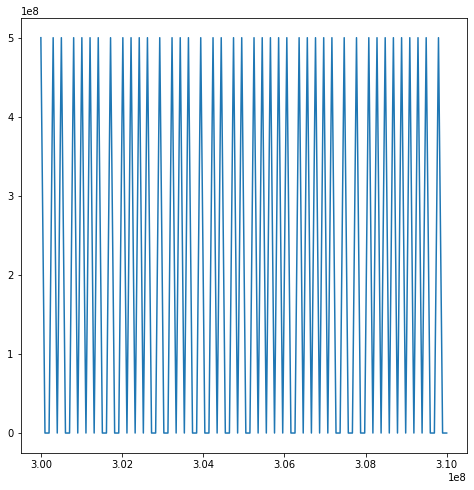

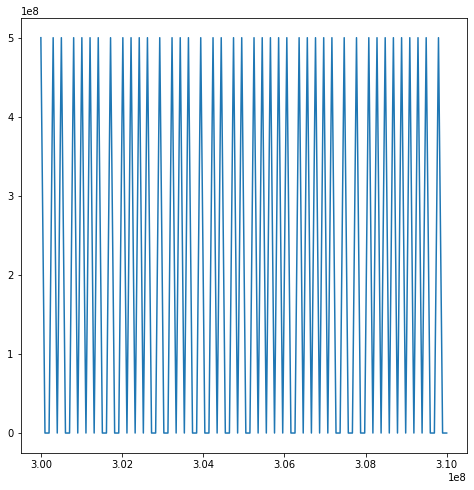

In [54]:
#c)
#Now let gamma vary
gamma_range=np.linspace(0.3e9,0.31e9,100) # A range I found demonstrate the cyclic nature in a visible manner graphically
tot_dist=[] #get total distance after 5 cycles
for i in gamma_range:
    gamma=i
    def ParticleAccel(x,vx,y,vy,t):
        Ax= q*vy*Bz(x,t)/m -gamma*vy
        Ay= q*Ey(x,t)/m +q*vx*Bz(x,t)/m-gamma*vx
        Az=0
        return Ax,Ay
    t=np.linspace(0,max_time,500)
    x=np.zeros(t.shape)
    vx=np.zeros(t.shape)
    y=np.zeros(t.shape)
    vy=np.zeros(t.shape)

    def vel_and_accel(vals,t):
        x,vx,y,vy=vals
        ax=ParticleAccel(x,vx,y,vy,t)[0]
        ay=ParticleAccel(x,vx,y,vy,t)[1]
        return [vx,ax,vy,ay]

    init_conds=[0,0,0,0]
    sol=odeint(vel_and_accel,init_conds,t)
    #Apply odeint
    x_sol=sol[:,0]
    vx_sol=sol[:,1]
    y_sol=sol[:,2]
    vy_sol=sol[:,3]

    tot_dist.append( np.sqrt(x_sol[-1]**2))
figure(1,figsize=(8,8))
plt.plot(gamma_range,tot_dist)

figure(2,figsize=(8,8))
plt.plot(gamma_range[0:100],tot_dist[0:100])